In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import time
import numpy as np

In [2]:
def prediction(model_path, img):
    model = YOLO(model_path)
    t0 = time.time()
    results = model(img, verbose=False)
    comp_time = time.time()-t0
    return results[0], comp_time


yolo_n = 'yolov8n.pt'
yolo_m = 'yolov8m.pt'
yolo_l = 'yolov8l.pt'
yolo_x = 'yolov8x.pt'

img_path = 'construction.jpg'
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB) 
comp_times = []

for path in (yolo_n, yolo_m, yolo_l, yolo_x):
    res, t = prediction(path, img)
    comp_times.append(t)

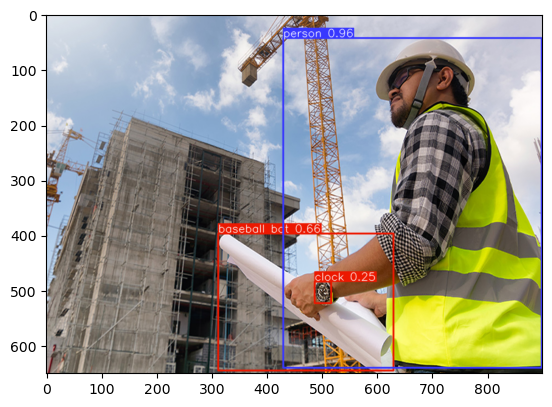

In [3]:
annotated_frame = res.plot()
plt.imshow(annotated_frame)


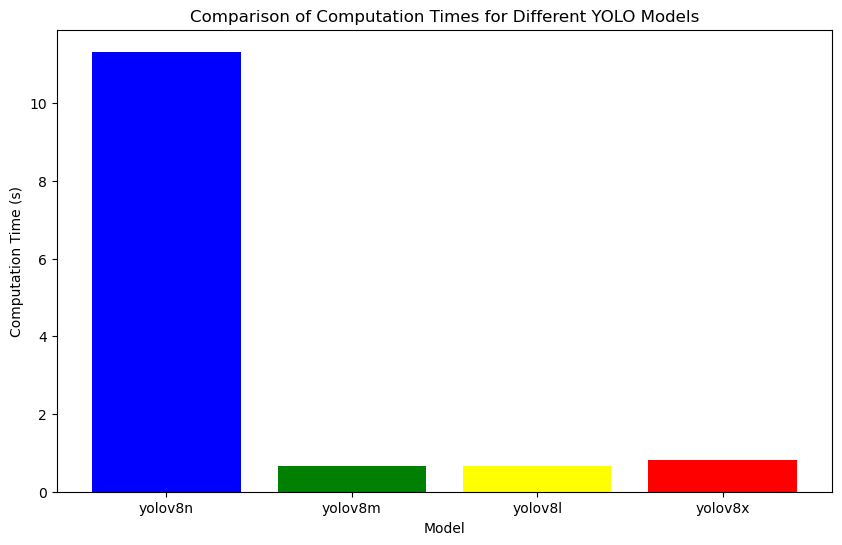

In [4]:
model_names = ['yolov8n', 'yolov8m', 'yolov8l', 'yolov8x']
# Plotting computation times
plt.figure(figsize=(10, 6))
plt.bar(model_names, comp_times, color=['blue', 'green', 'yellow', 'red'])
plt.xlabel('Model')
plt.ylabel('Computation Time (s)')
plt.title('Comparison of Computation Times for Different YOLO Models')
plt.show()

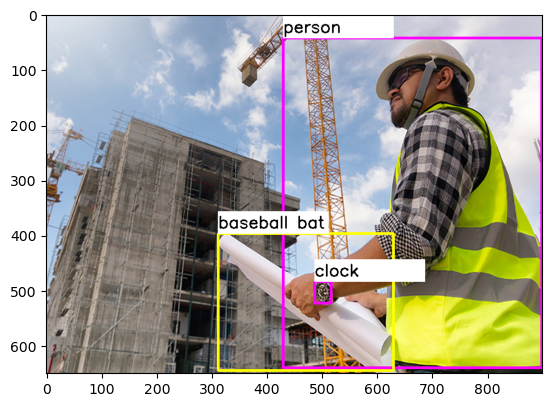

In [5]:
def plot_result(img, result):
    result = result.cpu().numpy()
    coords = result.boxes.xyxy
    names = result.names
    for i in range(len(coords)):
        id = names[result.boxes.cls[i]]
        random_color = (255*np.random.randint(0, 2), 255*np.random.randint(0, 2), 255*np.random.randint(0, 2))
        cv2.rectangle(img, (int(coords[i,0]), int(coords[i,1])), (int(coords[i,2]), int(coords[i,3])), color=random_color, thickness=3)
        cv2.rectangle(img, (int(coords[i,0]), int(coords[i,1])), (int(coords[i,0]+200), int(coords[i,1])-40), (255, 255, 255), -1)
        cv2.putText(img, id, (int(coords[i,0]), int(coords[i,1]-10)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

    plt.imshow(img)


img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB) 
plot_result(img, res)